In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Basic principles of machine learning

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.

Classification
========
First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [34]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=0)
print(X.shape)
print(y.shape)
print(X[:5, :])


(100, 2)
(100,)
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]


As the data is two-dimensional, we can plot each sample as a point in two-dimensional space, with the first feature being the x-axis and the second feature being the y-axis.

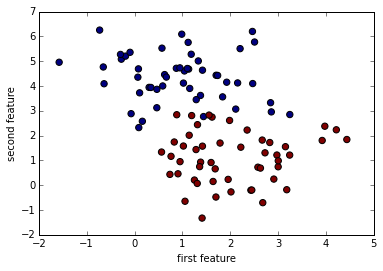

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")

As classification is a supervised task, and we are interested in how well the model generalizes, we split our data into a training set,
to built the model from, and a test-set, to evaluate how well our model performs on new data. The ``train_test_split`` function form the ``cross_validation`` module does that for us, by randomly splitting of 25% of the data for testing.
![train test split](figures/train_test_split.svg)

In [46]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### The scikit-learn estimator API

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a logistic regression is:

In [47]:
from sklearn.linear_model import LogisticRegression

All models in scikit-learn have a very consistent interface.
First, we instantiate the estimator object.

In [48]:
classifier = LogisticRegression()

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [49]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [52]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:


In [54]:
print(prediction)
print(y_test)

[1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1]
[1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1]


We can evaluate our classifier quantiatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [58]:
np.mean(prediction == y_test)

0.92000000000000004

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [60]:
classifier.score(X_test, y_test)

0.92000000000000004

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

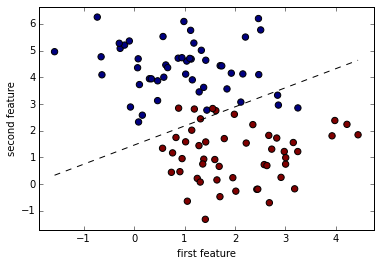

In [61]:
from figures import plot_2d_separator

plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X)

**Estimated parameters**: All the estimated parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [62]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.02974678 -1.43697237]]
[ 2.09263249]


Another classifier: K Nearest Neighbors
------------------------------------------------
Another popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The interface is exactly the same as for ``LogisticRegression above``.

In [ ]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print iris.target_names[knn.predict([[3, 5, 4, 2]])]

In [ ]:
# A plot of the sepal space and the prediction of the KNN
from helpers import plot_iris_knn
plot_iris_knn()

**Exercise**: Now use as an estimator on the same problem: sklearn.svm.SVC.

> Note that you don't have to know what it is do use it.

> If you finish early, do the same plot as above.

**Regression**: The simplest possible regression setting is the linear regression one:

In [ ]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.normal(size=20)

# Fit a linear regression to it
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print "Model coefficient: %.5f, and intercept: %.5f" % (model.coef_, model.intercept_)

# Plot the data and the model prediction
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test)

### Unsupervised Learning

**Unsupervised Learning** addresses a different sort of problem. Here the data has no labels,
and we are interested in finding similarities between the objects in question. In a sense,
you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can used unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we’ll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of
  features summarize best the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

**An example PCA for visualization** Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

In [ ]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print "Reduced dataset shape:", X_reduced.shape

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

print "Meaning of the 2 components:"
for component in pca.components_:
    print " + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names))

**Clustering**: Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X_reduced)
y_pred = k_means.predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred)

### A recap on Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we’ll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

# TODO MOVE WAY BACK

### Regularization: what it is and why it is necessary

**Train errors** Suppose you are using a 1-nearest neighbor estimator. How many errors do you expect on your train set?

This tells us that:
- Train set error is not a good measurement of prediction performance. You need to leave out a test set.
- In general, we should accept errors on the train set.

**An example of regularization** The core idea behind regularization is that we are going to prefer models that are simpler, for a certain definition of ''simpler'', even if they lead to more errors on the train set.

As an example, let's generate with a 9th order polynomial.

In [ ]:
rng = np.random.RandomState(0)
x = 2 * rng.rand(100) - 1

f = lambda t: 1.2 * t ** 2 + .1 * t ** 3 - .4 * t ** 5 - .5 * t ** 9
y = f(x) + .4 * rng.normal(size=100)

plt.figure()
plt.scatter(x, y, s=20)

And now, let's fit a 4th order and a 9th order polynomial to the data. For this we need to engineer features: the n_th powers of x:

In [ ]:
x_test = np.linspace(-1, 1, 100)

plt.scatter(x, y, s=20)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
order4 = LinearRegression()
order4.fit(X, y)
plt.plot(x_test, order4.predict(X_test), label='4th order')

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
order9 = LinearRegression()
order9.fit(X, y)
plt.plot(x_test, order9.predict(X_test), label='9th order')

plt.legend(loc='best')
plt.axis('tight')
plt.title('Fitting a 4th and a 9th order polynomial')

With your naked eyes, which model do you prefer, the 4th order one, or the 9th order one?

Let's look at the ground truth:

In [ ]:
plt.scatter(x, y, s=20)
plt.plot(x_test, f(x_test), label="truth")
plt.axis('tight')
plt.title('Ground truth (9th order polynomial)')

Regularization is ubiquitous in machine learning. Most scikit-learn estimators have a parameter to tune the amount of regularization. For instance, with k-NN, it is 'k', the number of nearest neighbors used to make the decision. k=1 amounts to no regularization: 0 error on the training set, whereas large k will push toward smoother decision boundaries in the feature space.

### Exercise: Interactive Demo on linearly separable data

Run the **svm_gui.py** file in the repository: https://github.com/jakevdp/sklearn_scipy2013

### Flow chart: how do I choose what to do with my data set?

<a href="http://scikit-learn.org/dev/tutorial/machine_learning_map/index.html"><img src="http://scikit-learn.org/dev/_static/ml_map.png" width=100%></a>